# Analysing the effectiveness of various training programs on improvements in Mandarin tone perception

### Background

Learning a new language involves a number of obstacles adult second-language (L2) learners have difficulties overcoming. For some, learning to perceive and produce L2 speech sounds not present in their first language (L1) presents the largest challenge. This is often the case when native speakers of an atonal language (e.g., English) attempt to learn a tonal language (e.g., Mandarin Chinese).  Traditional classroom-based learning based on explicit instruction and feedback is not well equipped to address these problems. Incidental learning may help overcome this learning plateau.  Incidental learning is a type of learning that occurs when learners are indirectly exposed to the stimuli they will learn while ostensibly focused on an unrelated task.  In this study, participants were recruited into four training groups (incidental learning, explicit learning, no training, and a group of native Mandarin speakers).  Participants engaged with their respective training programs for 8 weeks, then were assessed on their perception of Mandarin tones with the artificial langauge TOFU, which mimics Mandarin with a vocabulary of non-words.  

For this project, I will be analyzing participants' performance on a four-alternative forced choice task, in which participants hear a TOFU word that they have previously learned and are asked to match it to its corresponding character.


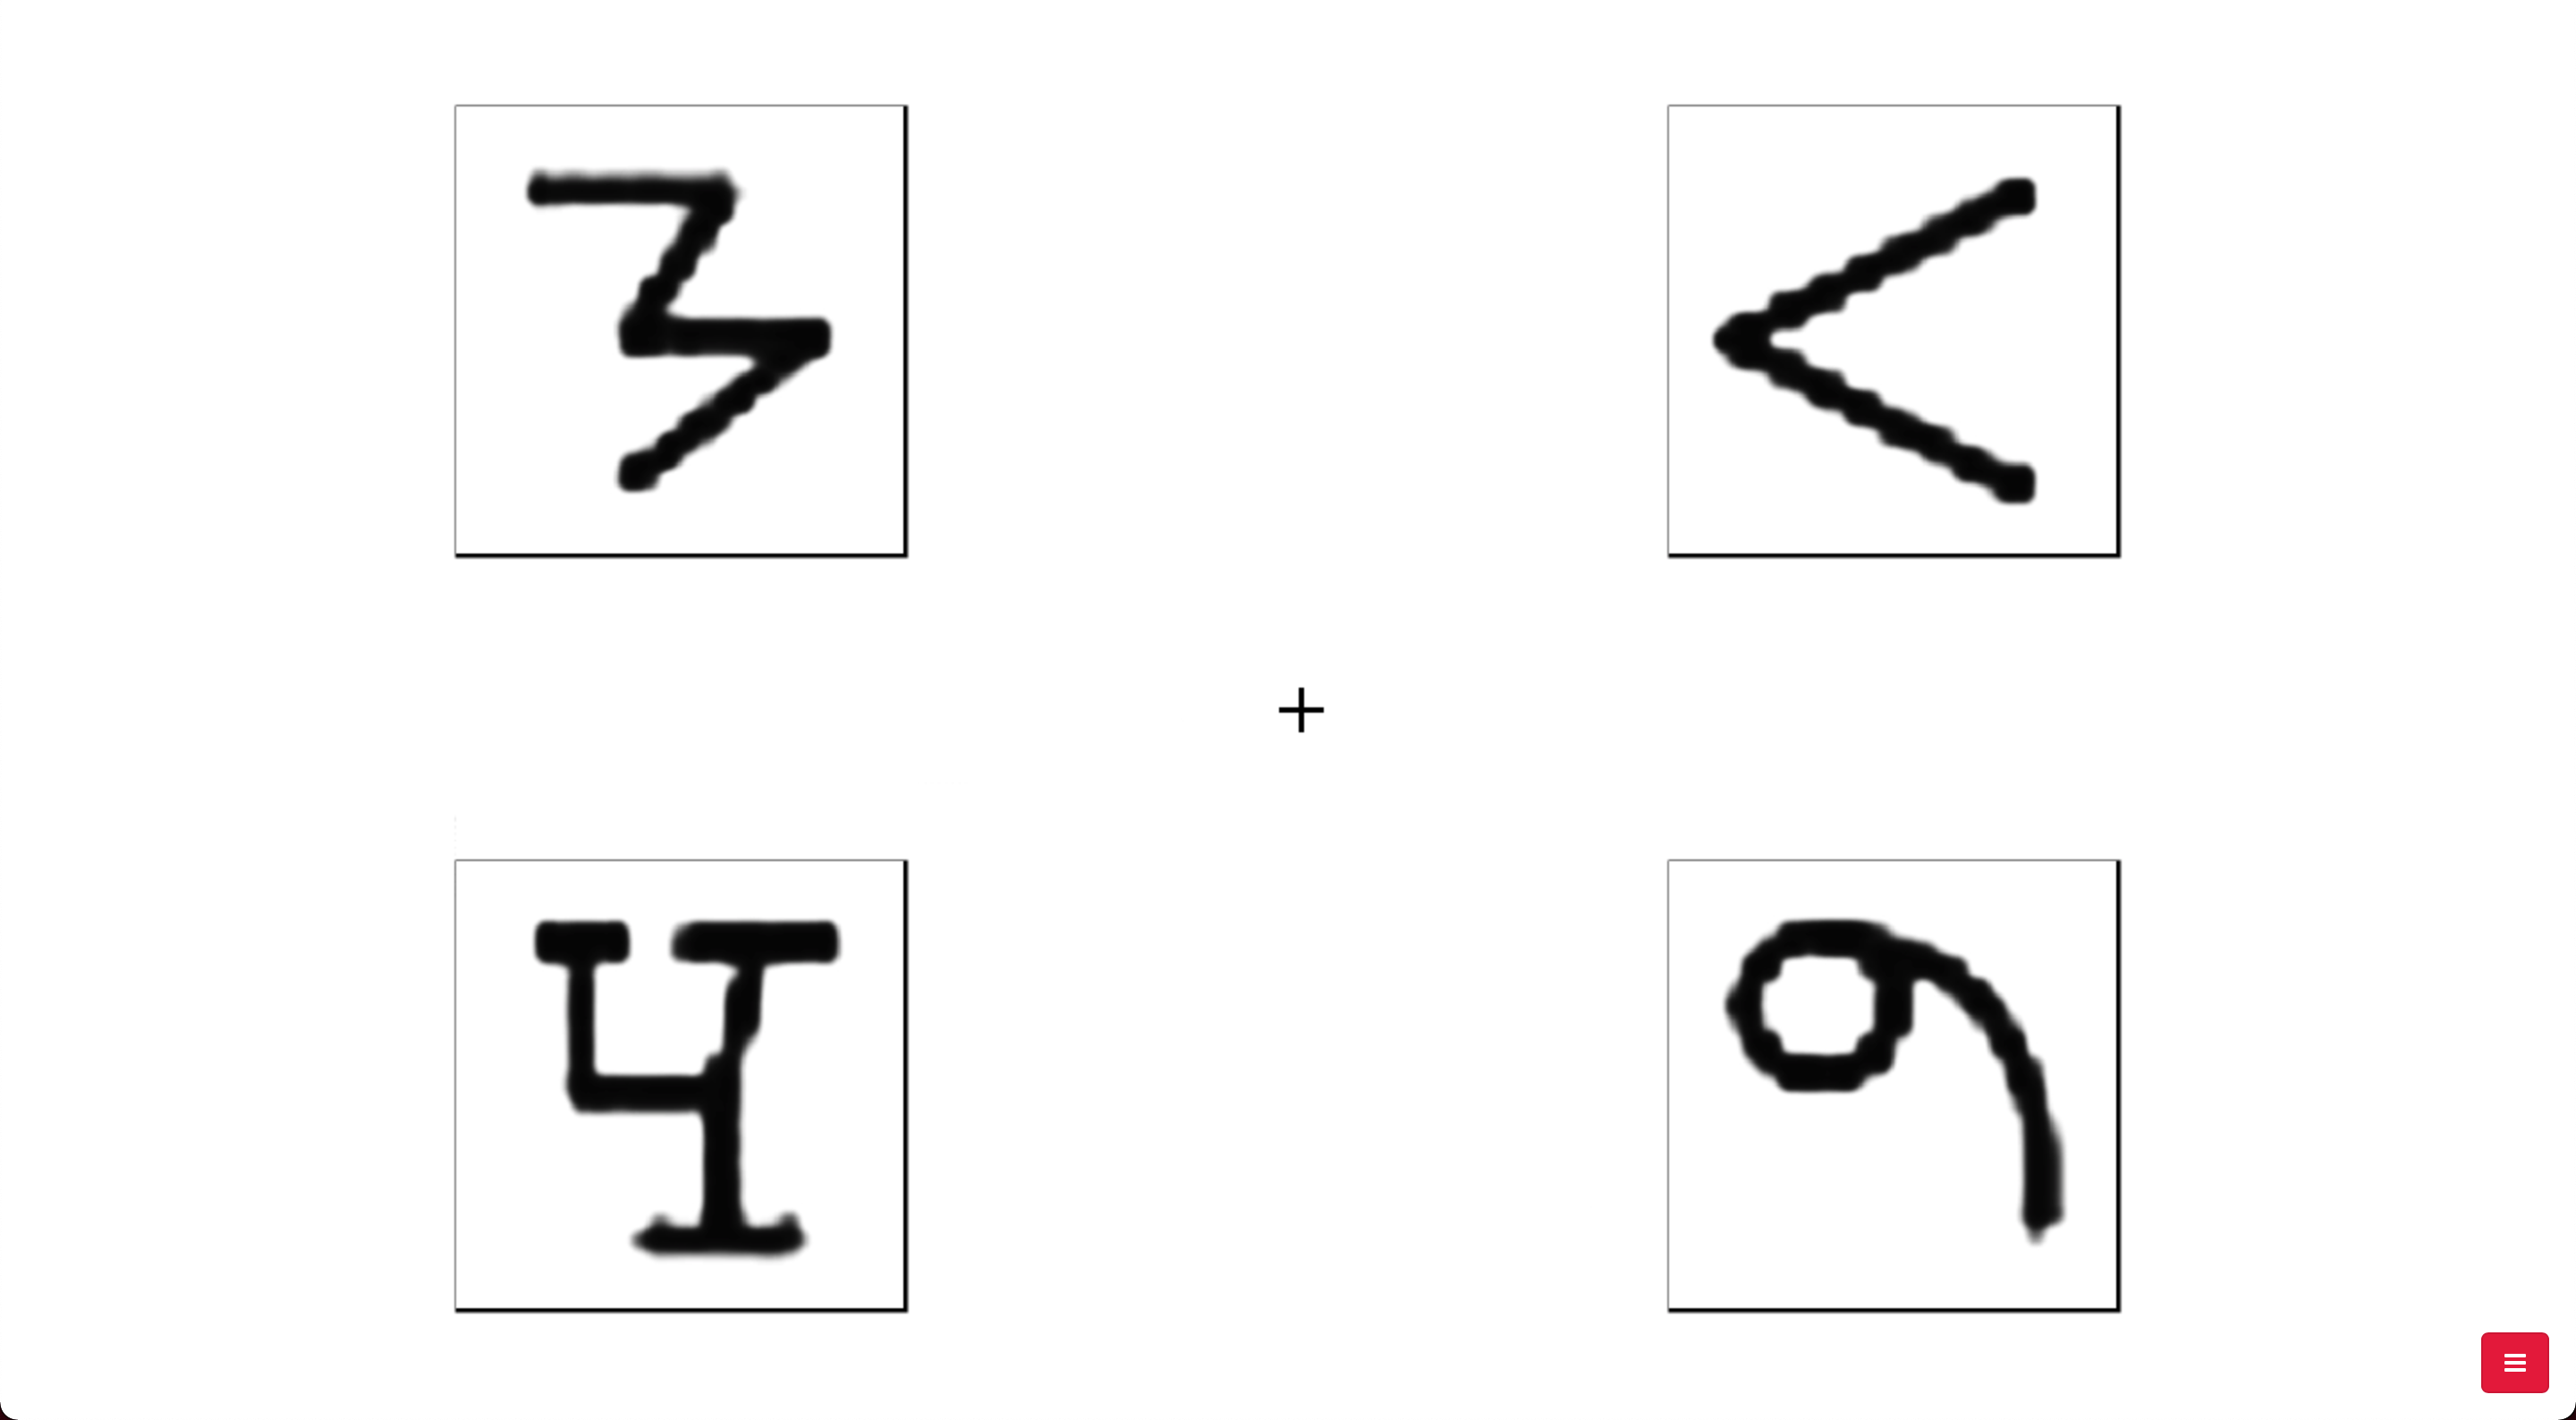

In [541]:
display_png(file="/Users/josephluetkehans/Desktop/Screen Shot 2022-04-26 at 9.22.37 AM.png")  

*This is a screenshot of the four-alternative forced choice task*

### Variables

*Specify all variables, their data type, how they were collected, and number of observations* 

Our raw data contains many extraneous variables that are removed far before analysis begins.  All variables were collected on either the Eprime or Gorilla experiment hosting services.  This experiment was performed remotely, so all data was collected from participants' own computers.  The variables that we will be using in our analysis are:
						
#### - participant_public_id
    - type: character (this is a unique ID for each participant, so 45 in total)
    - number of observations: 6270
#### - day
    - type: factor (3 levels: 1, 2, 3)
    - This variable represents which day of training each trial comes from.  
    - number of observations: 6270 
#### - response_aoi
    - type: factor (4 levels: 1, 2, 3, 4)
    - This variable represents which screen position the participant's response to each trial was in.  These numbers represents quadrants of the screen.
    - number of observations: 6270 
#### - response
    - type: factor (4 levels: target, competitor, distractor, rhyme)
    - This variable represents which of the four choices each participant made on each trial.  Target responses are the correct answer.  Competitor responses have the same tone as the target response, but a different syllable.  Distractor responses have no similarity to the target response.  Rhyme responses have the same syllable as the target response, but a different tone.
    - number of observations: 6270
#### - reaction_time
    - type: numerical (in milliseconds)
    - This variable represents how long in milliseconds it took participants to responsd to each trial.
    - number of observations: 6270
#### - participant_group
    - type: factor (6 levels: 1000, 2000, 3000, 4000, 5000, 6000)
    - These groups were used for recruitment, and different groups have been collapsed across training conditions.  Groups 1000 and 2000 were in the incidental training group, groups 3000 and 6000 were in the explicit training group, group 4000 was native Mandarin speakers, and group 5000 was in the no training group.
    - Number of observations: 6270
#### - correct
    - type: factor (2 levels, 0 and 1)
    - This variable indicates whether participants chose the target option during each trial.
    - number of observations: 6270
#### - proportion_of_responses
    - type: numerical (a fraction)
    - This variable is computed from each trial, and represents the proportion of each type of response that participants made.
    - number of observations: 540 (45 participants * 4 types of response * 3 days of testing)

### Hypotheses

*Explicitly state your hypothesis in terms of the structure of the models that you will be evaluating (e.g., What is the form of Y = f(X) for each hypothesis? Will you be using linear regression or classifier models?)*

#### Linear model: 
I hypothesize that day and training will significantly predict proportion of correct responses in the linear models: 

correct responses = day + training

proportion of correct responses = day + training

The null hypothesis here is that there is no relationship between these variables.

#### Power Analysis: 
I suppose that our null hypothesis for our power analysis is that our original data, with the number of participants/trials that we originally collected, is not sufficient to consistently find the effects that we are looking for.  However, because we are not performing a traditional statistical test for this analysis, this hypothesis structure might not apply.

For our power analysis, we will be using the model:
proportion of correct responses = training

#### kNN:
We hypothesize that we will be able to accurately predict participants' proportion of correct responses using our 'day' and 'training' variables.  This is a classifier model.  In the null/alternate hypothesis structure, we could say that our null hypothesis is that day and proportion of correct responses cannot be used to accurately predict participants' training group.

### Data Organization

*Provide descriptions of Data Architecture (e.g., how is the data organized), Data Cleansing & Tidying, and an example of the final of the Data Table(s) that will go into your analysis.*

In [539]:
#Load in packages

library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(psych)
library(reshape2)
library(dplyr)
library(IRdisplay)

Warning message:
“package ‘IRdisplay’ was built under R version 3.6.2”


In [325]:
#Read in Data

day1 <- read.csv(here('data', 'tofu4afcday1new.csv'))
day2 <- read.csv(here('data', 'tofu4afcday2new.csv'))
day3 <- read.csv(here('data', 'tofu4afcday3new.csv'))
eprime <- read.csv(here('data', 'TOFU_4AFC_Eprime_data_processed.csv'))

head(day1)
head(day2)
head(day3)
head(eprime)

,Event.Index,UTC.Timestamp,UTC.Date,Local.Timestamp,Local.Timezone,Local.Date,Experiment.ID,Experiment.Version,Tree.Node.Key,Repeat.Key,⋯,AOI3,AOI4,AOI1.id,AOI2.id,AOI3.id,AOI4.id,targetButton,competitorAOI,rhymeAOI,distAOI
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>,<lgl>,⋯,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
1,1,1.640541e+12,26/12/2021 17:49:26,1.640541e+12,-5,26/12/2021 12:49:26,19278,7,task-44es,NA,⋯,,,NA,NA,NA,NA,,NA,NA,NA
2,2,1.640541e+12,26/12/2021 17:49:40,1.640541e+12,-5,26/12/2021 12:49:40,19278,7,task-44es,NA,⋯,,,NA,NA,NA,NA,,NA,NA,NA
3,3,1.640541e+12,26/12/2021 17:49:41,1.640541e+12,-5,26/12/2021 12:49:41,19278,7,task-44es,NA,⋯,rai4,fiu1,61,125,16,30,button2.png,1,3,4
4,4,1.640541e+12,26/12/2021 17:49:47,1.640541e+12,-5,26/12/2021 12:49:48,19278,7,task-44es,NA,⋯,rai4,fiu1,61,125,16,30,button2.png,1,3,4
5,5,1.640541e+12,26/12/2021 17:49:54,1.640541e+12,-5,26/12/2021 12:49:54,19278,7,task-44es,NA,⋯,rai4,fiu1,61,125,16,30,button2.png,1,3,4
6,6,1.640541e+12,26/12/2021 17:49:55,1.640541e+12,-5,26/12/2021 12:49:55,19278,7,task-44es,NA,⋯,ziu2,rai4,1,29,38,84,button3.png,2,1,4


,Event.Index,UTC.Timestamp,UTC.Date,Local.Timestamp,Local.Timezone,Local.Date,Experiment.ID,Experiment.Version,Tree.Node.Key,Repeat.Key,⋯,AOI3,AOI4,AOI1.id,AOI2.id,AOI3.id,AOI4.id,targetButton,competitorAOI,rhymeAOI,distAOI
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>,<lgl>,⋯,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
1,1,1.609539e+12,01/01/2021 22:17:40,1.609539e+12,-5,01/01/2021 17:17:42,19279,4,task-44es,NA,⋯,,,NA,NA,NA,NA,,NA,NA,NA
2,2,1.609539e+12,01/01/2021 22:17:45,1.609539e+12,-5,01/01/2021 17:17:47,19279,4,task-44es,NA,⋯,,,NA,NA,NA,NA,,NA,NA,NA
3,3,1.609539e+12,01/01/2021 22:17:47,1.609539e+12,-5,01/01/2021 17:17:49,19279,4,task-44es,NA,⋯,riu3,giu2,30,49,75,7,button2.png,1,3,4
4,4,1.609539e+12,01/01/2021 22:17:49,1.609539e+12,-5,01/01/2021 17:17:51,19279,4,task-44es,NA,⋯,riu3,giu2,30,49,75,7,button2.png,1,3,4
5,5,1.609539e+12,01/01/2021 22:17:50,1.609539e+12,-5,01/01/2021 17:17:52,19279,4,task-44es,NA,⋯,riu3,giu2,30,49,75,7,button2.png,1,3,4
6,6,1.609539e+12,01/01/2021 22:17:52,1.609539e+12,-5,01/01/2021 17:17:53,19279,4,task-44es,NA,⋯,fiu4,me4,45,67,43,94,button3.png,4,2,1


,Event.Index,UTC.Timestamp,UTC.Date,Local.Timestamp,Local.Timezone,Local.Date,Experiment.ID,Experiment.Version,Tree.Node.Key,Repeat.Key,⋯,AOI3,AOI4,AOI1.id,AOI2.id,AOI3.id,AOI4.id,targetButton,competitorAOI,rhymeAOI,distAOI
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>,<lgl>,⋯,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
1,1,1.60997e+12,06/01/2021 21:54:48,1.60997e+12,-5,06/01/2021 16:54:49,19281,5,task-44es,NA,⋯,,,NA,NA,NA,NA,,NA,NA,NA
2,2,1.60997e+12,06/01/2021 21:54:55,1.60997e+12,-5,06/01/2021 16:54:56,19281,5,task-44es,NA,⋯,,,NA,NA,NA,NA,,NA,NA,NA
3,3,1.60997e+12,06/01/2021 21:54:56,1.60997e+12,-5,06/01/2021 16:54:57,19281,5,task-44es,NA,⋯,me3,pe3,118,112,110,22,button4.png,3,1,2
4,4,1.60997e+12,06/01/2021 21:54:59,1.60997e+12,-5,06/01/2021 16:54:59,19281,5,task-44es,NA,⋯,me3,pe3,118,112,110,22,button4.png,3,1,2
5,5,1.60997e+12,06/01/2021 21:54:59,1.60997e+12,-5,06/01/2021 16:55:00,19281,5,task-44es,NA,⋯,me3,pe3,118,112,110,22,button4.png,3,1,2
6,6,1.60997e+12,06/01/2021 21:55:01,1.60997e+12,-5,06/01/2021 16:55:01,19281,5,task-44es,NA,⋯,gi4,zi2,79,118,48,80,button3.png,4,2,1


,X,ID,T4AFC.day,T4AFC.resp,T4AFC.resp_type,T4AFC.tone,T4AFC.slide,T4AFC.rt
,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
1,1,1101,1,3,Rhyme,2,F17_05.bmp,3587
2,2,1101,1,2,Tonal,2,F18_05.bmp,3871
3,3,1101,1,4,Rhyme,4,T08_02.bmp,3024
4,4,1101,1,1,Rhyme,4,F19_05.bmp,3243
5,5,1101,1,1,Tonal,3,F20_05.bmp,3878
6,6,1101,1,3,Rhyme,2,T09_03.bmp,2358


#### Cleaning eprime data

Here, I will be cleaning the data collected from eprime and putting it an a format that will be easy to combine with the data collected from Gorilla.

In [326]:
eprimeclean <- eprime %>%
    subset(select = -c(X, T4AFC.slide, T4AFC.tone)) %>%
    mutate(T4AFC.resp_type=ifelse(T4AFC.resp_type=="Rhyme", "rhyme", 
                           ifelse(T4AFC.resp_type=="Tonal", "competitor", 
                           ifelse(T4AFC.resp_type=="Dist", "distractor", 
                           ifelse(T4AFC.resp_type=="Target", "target", 
                           ifelse(T4AFC.resp_type=="", NA, NA)))))) %>%
    mutate(participant_group = floor((ID / 1000) %% 10) *1000) %>%
    mutate(correct = ifelse(T4AFC.resp_type == 'target', 1, 0)) %>%
    na.omit()

colnames(eprimeclean) <- c('participant_public_id', 'day', 'response_aoi', 'response', 'reaction_time', "participant_group", 'correct')

head(eprimeclean)

,participant_public_id,day,response_aoi,response,reaction_time,participant_group,correct
,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
1,1101,1,3,rhyme,3587,1000,0
2,1101,1,2,competitor,3871,1000,0
3,1101,1,4,rhyme,3024,1000,0
4,1101,1,1,rhyme,3243,1000,0
5,1101,1,1,competitor,3878,1000,0
6,1101,1,3,rhyme,2358,1000,0


#### Cleaning and Combining Gorilla Data

The data for the T4AFC task collected in Gorilla exists in three dataframes, one for each day of testing.  These need to be combined, and extraneous variables must be removed.

I also need to clean the data before I make any further changes for the purposes of analysis.  This means cleaning column names and removing any NA values from the dataset.

In [328]:
#I need to add a 'day' variable to each dataset so we know what day each trial comes from when we combine our data

day1 <- day1 %>%
mutate(day = 1)

day2 <- day2 %>%
mutate(day = 2)

day3 <- day3 %>%
mutate(day = 3)


In [1]:
#Checking that all of our datasets have the same variables

#names(day1)
#names(day2)
#names(day3)

#There was no way to print these results without it being almost as long as the notebook itself

It appears that day1 has some variables that are not included in the day2 and day3 data.  I will use a for loop to look through the names in day 1 and pick out the names that are not included in day2.  Then, I will remove these names.

In [330]:
day1names <- data.frame(names(day1))
day2names <- data.frame(names(day2))
day3names <- data.frame(names(day3))

#defining a 'not in' function for quality of life
'%!in%' <- Negate('%in%')

#namestoremove <- data.frame(name)

for(name in day1names$names.day1.) {
    if(name %!in% day2names$names.day2.) {
        print(name)
    }
}

[1] "branch.he2d"
[1] "counterbalance.32i8"


In [367]:
day1 <- day1 %>%
subset(select = -c(branch.he2d, counterbalance.32i8))

ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'branch.he2d' not found


All of our datasets now have the same variables, so we can combine them.

In [332]:
#combining dataframes

data <- rbind(day1, day2, day3)
head(data)

,Event.Index,UTC.Timestamp,UTC.Date,Local.Timestamp,Local.Timezone,Local.Date,Experiment.ID,Experiment.Version,Tree.Node.Key,Repeat.Key,⋯,AOI4,AOI1.id,AOI2.id,AOI3.id,AOI4.id,targetButton,competitorAOI,rhymeAOI,distAOI,day
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>,<lgl>,⋯,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<dbl>
1,1,1.640541e+12,26/12/2021 17:49:26,1.640541e+12,-5,26/12/2021 12:49:26,19278,7,task-44es,NA,⋯,,NA,NA,NA,NA,,NA,NA,NA,1
2,2,1.640541e+12,26/12/2021 17:49:40,1.640541e+12,-5,26/12/2021 12:49:40,19278,7,task-44es,NA,⋯,,NA,NA,NA,NA,,NA,NA,NA,1
3,3,1.640541e+12,26/12/2021 17:49:41,1.640541e+12,-5,26/12/2021 12:49:41,19278,7,task-44es,NA,⋯,fiu1,61,125,16,30,button2.png,1,3,4,1
4,4,1.640541e+12,26/12/2021 17:49:47,1.640541e+12,-5,26/12/2021 12:49:48,19278,7,task-44es,NA,⋯,fiu1,61,125,16,30,button2.png,1,3,4,1
5,5,1.640541e+12,26/12/2021 17:49:54,1.640541e+12,-5,26/12/2021 12:49:54,19278,7,task-44es,NA,⋯,fiu1,61,125,16,30,button2.png,1,3,4,1
6,6,1.640541e+12,26/12/2021 17:49:55,1.640541e+12,-5,26/12/2021 12:49:55,19278,7,task-44es,NA,⋯,rai4,1,29,38,84,button3.png,2,1,4,1


Our Gorilla data doesn't currently say what the category of each response is (target, competitor, rhyme, or distractor).  We will quickly write a function that will determine that, and use it to add a new variable to our Gorilla data.

In [333]:
def_response_aoi <- function(subjectresponse, targetaoi, compaoi, rhymeaoi, distaoi) {
      returnaoi <- ''
      if(subjectresponse == targetaoi){
        returnaoi <- 'target'
      }
      if(subjectresponse == compaoi){
        returnaoi <- 'competitor'
      }
      if(subjectresponse == rhymeaoi){
        returnaoi <- 'rhyme'
      }
      if(subjectresponse == distaoi){
        returnaoi <- 'distractor'
      }
      return(returnaoi)
    }

Here, I will be cleaning column names and removing extraneous variables

This dataset contains A LOT of variables that are not immediately relevant to our analysis.  I will be removing
a majority of the variables from this dataset and transforming some other variables for quality of life.  The variables collected from Gorilla must also match the variables available in the data from eprime so that they can all be combined into a single dataset.  

Our 'response' variable, which shows how participants answered on each trial, has some missing values that are 
coded differently.  We will also remove those trials here, leaving only the values that indicate participants made a response.

I will also recode our 'response' variable to an integer instead of a string.  
Now, it will match the other variables that mark areas of interest

In [334]:
dataclean <- data %>%
    clean_names() %>%
    subset(select = -c(participant_private_id, utc_timestamp, utc_date, local_timestamp, local_timezone, local_date, schedule_id, 
                       participant_status, participant_device_type, participant_device, participant_os, participant_browser, reaction_onset,
                       participant_monitor_size, participant_viewport_size, image_id, incorrect, randomise_blocks, randomise_trials, 
                       dishonest, x_coordinate, y_coordinate, timed_out, zone_name, zone_type, checkpoint, participant_external_session_id, 
                       participant_completion_code, participant_starting_group, repeat_key, tree_node_key, experiment_id, experiment_version, 
                       task_name, task_version, screen_number, screen_name, spreadsheet, spreadsheet_name, spreadsheet_row, attempt, pic_file, 
                       event_index, feedback, order, trial_id, trial_number, conid, condition, display, aoi1_id, aoi2_id, aoi3_id, aoi4_id, 
                       wav_file2, target_button)) %>%
    na.omit() %>%
    subset(response %in% c('button1.png','button2.png','button3.png','button4.png')) %>%
    mutate(reaction_time = as.numeric(reaction_time)) %>%
    mutate(response_aoi = '') %>%
    mutate(participant_group = floor((participant_public_id / 1000) %% 10) *1000)
    dataclean$response = as.character(dataclean$response)
    dataclean$response[dataclean$response == 'button1.png'] <- '1'
    dataclean$response[dataclean$response == 'button2.png'] <- '2'
    dataclean$response[dataclean$response == 'button3.png'] <- '3'
    dataclean$response[dataclean$response == 'button4.png'] <- '4'
    dataclean$response = as.integer(dataclean$response)

rownames(dataclean) <- NULL #resetting row ordering that was lost during data cleansing

for(i in 1:length(dataclean$response)){
    dataclean$response_aoi[i] = def_response_aoi(dataclean$response[i], dataclean$target_aoi[i], 
                                                 dataclean$competitor_aoi[i], dataclean$rhyme_aoi[i], 
                                                 dataclean$dist_aoi[i])
        }

#Now that we have transformed the variables that we want to transform, we will remove variables that are not included
#In the eprime data.  I also need to switch a variable name that was imported incorrectly

dataclean <- dataclean %>%
subset(select = -c(target_aoi, sound, aoi1, aoi2, aoi3, aoi4, competitor_aoi, rhyme_aoi, dist_aoi)) 
colnames(dataclean) <- c('participant_public_id', 'reaction_time', 'response_aoi', 'correct', 'day', 'response', 'participant_group')
head(dataclean)

,participant_public_id,reaction_time,response_aoi,correct,day,response,participant_group
,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>
1,5131,2142,2,1,1,target,5000
2,5131,2424,3,1,1,target,5000
3,5131,2477,4,0,1,rhyme,5000
4,5131,2124,2,0,1,distractor,5000
5,5131,1284,2,1,1,target,5000
6,5131,2230,4,1,1,target,5000


#### Combining Eprime and Gorilla data

In [336]:
fulldata <- rbind(eprimeclean, dataclean) %>%
na.omit() 

rownames(fulldata) <- NULL #resetting row numbering one more time, just in case
head(fulldata)

,participant_public_id,day,response_aoi,response,reaction_time,participant_group,correct
,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1101,1,3,rhyme,3587,1000,0
2,1101,1,2,competitor,3871,1000,0
3,1101,1,4,rhyme,3024,1000,0
4,1101,1,1,rhyme,3243,1000,0
5,1101,1,1,competitor,3878,1000,0
6,1101,1,3,rhyme,2358,1000,0


#### Additional Transformations Before Starting Analysis

Right now, our data doesn't tell us what training each participant received.  Participant_group is a little vague, so I will add an additional variable that indicates whether participants engaged in explicit training, incidental training, or no training.  We will also mark whether participants were native Mandarin speakers or not.  All of this information is encoded in participant_group, but I will expand it to other variables to make analysis easier later on.

Additionally, our participants have different IDs depending on what day of training each trial is from.  Because we have 'day' marked by a different variable now, I will give all participants the same IDs across days so that we can analyze participant performance across days.

I also have a list of IDs that are inelligible, either because participants did not pass pre-screening, or because they did not fully complete the self-monitored task.  I will remove those participants here.

In [338]:
ineligibleIDs = c("4002", "1024", "1028", "1034", "2008", "2011", "2012", "2031", "2033", "2034", "2038", "3001", "4004", "4005", "4006", 
                    "4017", "4025", "4026", "4029", "4032", "4033", "4034", "6002", "6001", "1041", "4035", "1062", "1069", "1060", "1070", 
                    "1075", "1085", "5027", "6009", "1040", "2044", "2048", "2052", "4003", "4023", "4024", "5024", "6015", "1021", "1031", 
                    "1043", "1046", "1047", "1048", "1049", "1050", "1051", "1052", "1053", "1054", "1055", "1056", "1058", "1061", "1064", 
                    "1065", "1066", "1067", "1068", "1071", "1072", "1073", "1074", "1076", "1077", "1078", "1079", "1080", "1081", "1082", 
                    "1083", "1084", "1086", "1087", "1088", "1089", "1090", "1091", "1092", "1095", "1096", "1097", "1098", "1099", "2026", 
                    "2028", "2037", "2039", "2040", "2043", "2049", "3009", "3011", "3016", "3018", "3022", "5011", "5012", "5016", "5020", 
                    "5021", "6003", "6004", "6014", "6019", "5019", "5034", "7003", "1029", "1032", "1042", "2001", "2002", "2005", "2006", 
                    "1003", "1004", "1005", "1007", "1008", "1010", "1011", "1012", "1022", "1026", "1033", "1094", "2007", "2035", "2036")

In [538]:
is_native <- function(group) {
    ifelse(group == 4000, 1, 0)
    }

training_status <- function(group) {
    ifelse(group %in% c(1000, 2000), 'incidental', 
    ifelse(group %in% c(3000, 6000), 'explicit', 
    ifelse(group %in% c(4000), 'native', 'no training')))
    }

fulldata <- fulldata %>%
mutate(training = training_status(participant_group)) %>%
mutate(native = is_native(participant_group)) %>%
mutate(participant_public_id = participant_public_id - (day * 100)) %>%
filter(participant_public_id %!in% ineligibleIDs)

head(fulldata)
nrow(fulldata)

,participant_public_id,day,response_aoi,response,reaction_time,participant_group,correct,training,native
,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,901,1,3,rhyme,3587,1000,0,incidental,0
2,901,1,2,competitor,3871,1000,0,incidental,0
3,901,1,4,rhyme,3024,1000,0,incidental,0
4,901,1,1,rhyme,3243,1000,0,incidental,0
5,901,1,1,competitor,3878,1000,0,incidental,0
6,901,1,3,rhyme,2358,1000,0,incidental,0


[1] 6270

I will make some additional transformations for some of our analyses.
- recode in a new dataframe so that I am actually looking at proportion of correct responses per participant

In [351]:
participant_daily_totals <- data.frame(table(fulldata$participant_public_id, fulldata$participant_group, fulldata$training, fulldata$day, fulldata$response)) %>%
filter(Freq != 0) %>%
filter(Var3 != '') %>%
filter(Var4 != '') %>%
filter(Var5 != '')

colnames(participant_daily_totals) <- c("participant_public_id", "participant_group", 'training', 'day', "response", "freq")

head(participant_daily_totals)


,participant_public_id,participant_group,training,day,response,freq
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,6008,6000,explicit,1,competitor,11
2,6013,6000,explicit,1,competitor,8
3,6016,6000,explicit,1,competitor,11
4,1001,1000,incidental,1,competitor,8
5,1002,1000,incidental,1,competitor,7
6,1006,1000,incidental,1,competitor,4


In [342]:
participant_frequencies <- aggregate(fulldata$response, by = list(fulldata$participant_public_id, fulldata$day), FUN = length)
group_frequencies <- aggregate(fulldata$response, by = list(fulldata$participant_group, fulldata$day), FUN = length)

colnames(participant_frequencies) <- c('participant_public_id', 'day', 'number_of_trials')
colnames(group_frequencies) <- c('participant_group', 'day', 'number_of_trials')

head(participant_frequencies)
group_frequencies

,participant_public_id,day,number_of_trials
,<dbl>,<dbl>,<int>
1,1001,1,48
2,1002,1,48
3,1006,1,48
4,1030,1,48
5,1036,1,48
6,1038,1,48


participant_group,day,number_of_trials
<dbl>,<dbl>,<int>
1000,1,335
2000,1,330
4000,1,477
5000,1,672
6000,1,144
1000,2,478
2000,2,334
4000,2,476
5000,2,672


Now, I can transform the data again so that we have a data frame that lists each participant, their group, the day, the response type, the frequency of each response type per day, the total number of responses each day, and the proportion of that response type against their daily total.

In [352]:
data_with_fractions <- merge(participant_daily_totals, participant_frequencies) %>%
mutate(proportion_of_responses = freq / number_of_trials)

head(data_with_fractions)

,participant_public_id,day,participant_group,training,response,freq,number_of_trials,proportion_of_responses
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
1,1001,1,1000,incidental,target,17,48,0.35416667
2,1001,1,1000,incidental,rhyme,13,48,0.27083333
3,1001,1,1000,incidental,distractor,10,48,0.20833333
4,1001,1,1000,incidental,competitor,8,48,0.16666667
5,1001,2,1000,incidental,competitor,14,47,0.29787234
6,1001,2,1000,incidental,distractor,4,47,0.08510638


So now, the two main data sets we will be analyzing are fulldata and data_with_fractions.

### Analysis

*Show both your data visualizations and summarize the results from your models*

Power Analysis via Simulations- do we have enough power with the size of our training groups?

Linear Regression- effect of day and training on proportion of correct responses

Using kNN to predict training group from proportion of correct responses

#### Linear Regression

step 1: visualize relationships that I'm curious about
- I'd first like to look at how proportion of each type of response are distributed across training groups, by day.

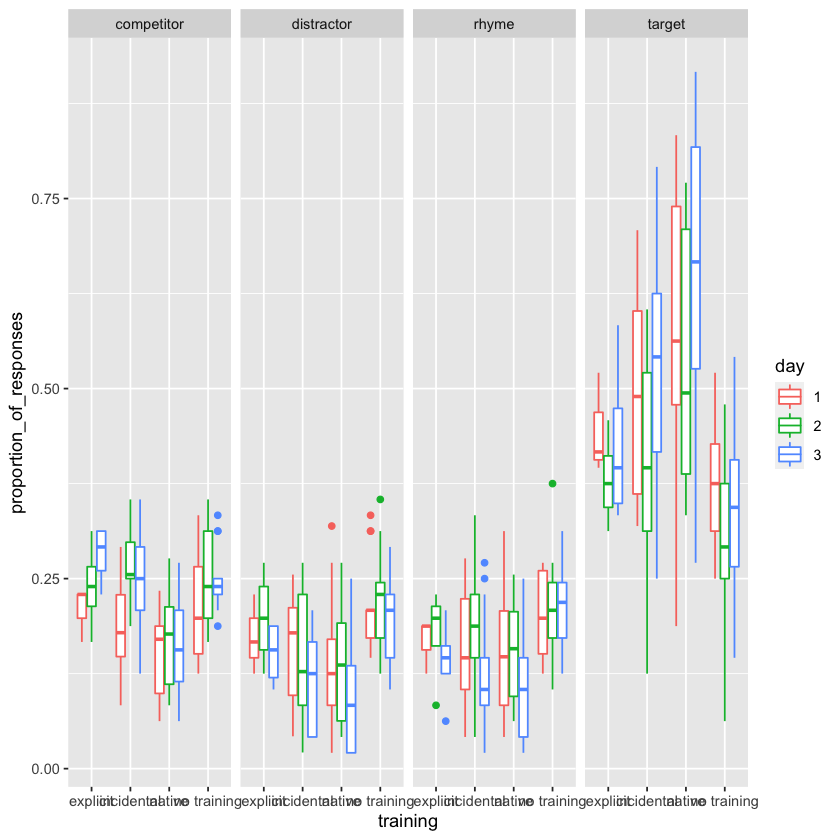

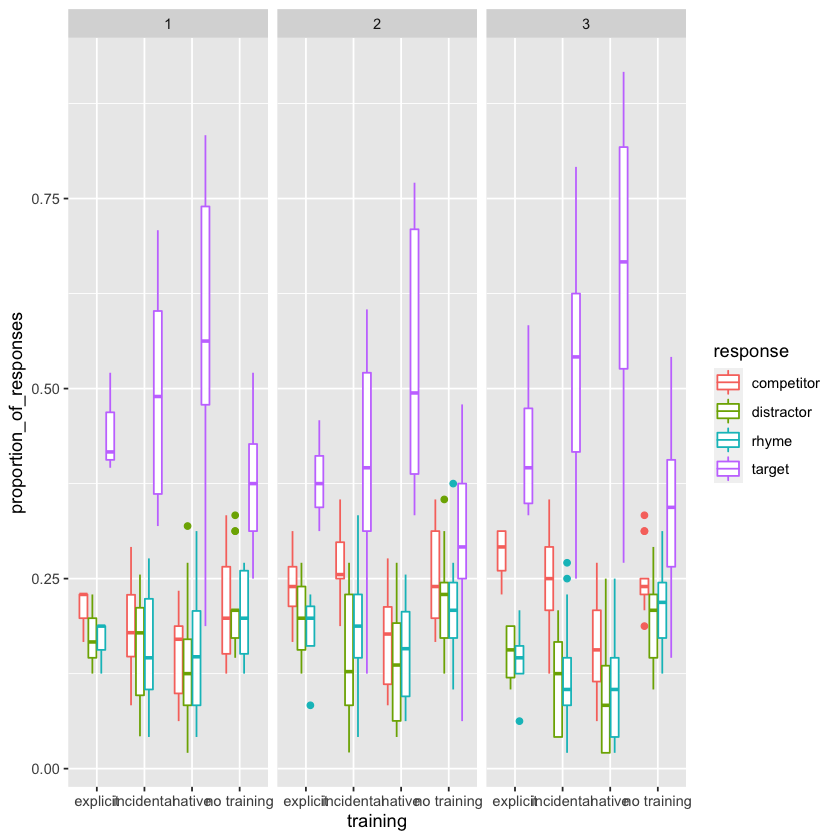

In [344]:
response_plot1 <- ggplot(data = data_with_fractions, 
                      aes(x = training, y = proportion_of_responses, color = day)) + 
                      geom_boxplot() + 
                      facet_grid(. ~ response)

response_plot2 <- ggplot(data = data_with_fractions, 
                      aes(x = training, y = proportion_of_responses, color = response), width = 10) + 
                      geom_boxplot() + 
                      facet_grid(. ~ day)

response_plot1
response_plot2

Even with rescaling, these plots are difficult to read.  Let's try looking at only target responses to see if we can infer a trend across days from our plot.

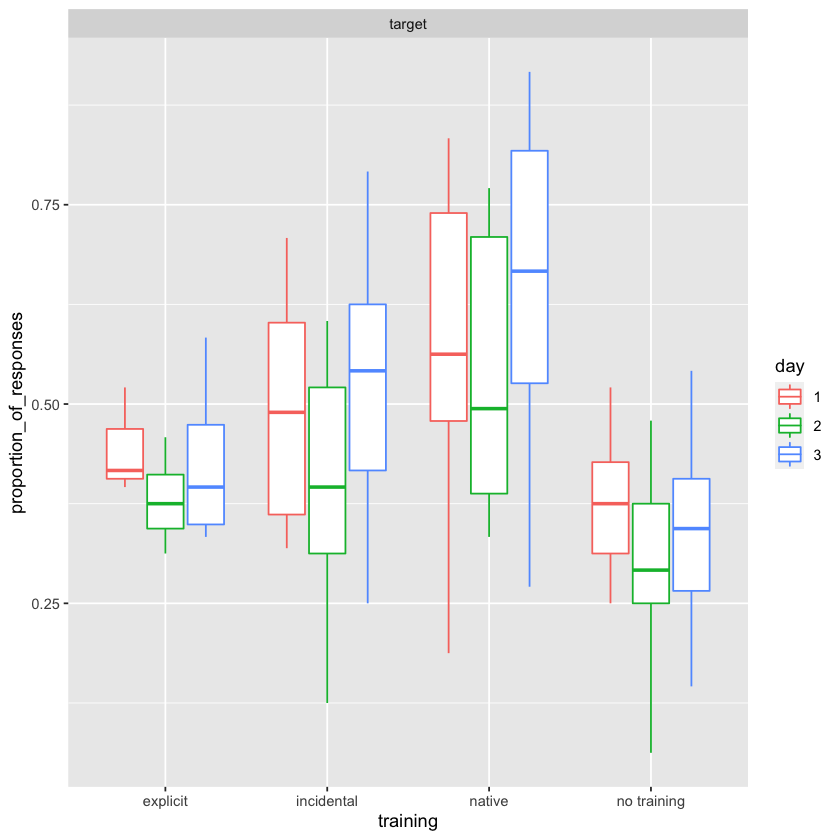

In [527]:
target_fractions <- data_with_fractions %>%
filter(response == 'target')

target_plot1 <- ggplot(data = target_fractions, 
                      aes(x = training, y = proportion_of_responses, color = day)) + 
                      geom_boxplot() + 
                      facet_grid(. ~ response)

target_plot1

It appears that proportion of correct responses changes across each day of training for each group.  It also appears that proportion of correct responses is different for each training group, across each day.  We can use a linear model to assess whether this effect exists.

I will begin by training a model that predicts participants' correct responses as a function of their training group, and the day of testing.  I will also train a model that considers participants' *proportion* of correct responses, to see if there is any difference between them.

In [509]:
raw_model <- lm(correct ~ day + training, data = fulldata)

proportion_model <- lm(proportion_of_responses ~ day + training, data = target_fractions)

summary(raw_model)
summary(proportion_model)



Call:
lm(formula = correct ~ day + training, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5934 -0.4598 -0.3292  0.5200  0.6708 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.393737   0.026611  14.796  < 2e-16 ***
day                  0.010061   0.007636   1.317  0.18773    
trainingincidental   0.056042   0.023614   2.373  0.01766 *  
trainingnative       0.169512   0.024913   6.804 1.11e-11 ***
trainingno training -0.074572   0.023925  -3.117  0.00184 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4892 on 6265 degrees of freedom
Multiple R-squared:  0.03368,	Adjusted R-squared:  0.03306 
F-statistic: 54.58 on 4 and 6265 DF,  p-value: < 2.2e-16



Call:
lm(formula = proportion_of_responses ~ day + training, data = target_fractions)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41113 -0.09217 -0.01223  0.10475  0.30027 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.43204    0.04611   9.370 3.97e-16 ***
day2                -0.06525    0.03008  -2.169 0.031941 *  
day3                 0.01776    0.03008   0.591 0.555873    
trainingincidental   0.05533    0.04653   1.189 0.236631    
trainingnative       0.16659    0.04909   3.394 0.000924 ***
trainingno training -0.07693    0.04717  -1.631 0.105444    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1392 on 125 degrees of freedom
Multiple R-squared:  0.3402,	Adjusted R-squared:  0.3138 
F-statistic: 12.89 on 5 and 125 DF,  p-value: 4.103e-10


Interestingly, these models find different effects of our chosen features on either participants' correct responses, or their proportion of correct responses.  The 'raw' model does not find a significant effect of day on correct responses, and the 'proportion' model only finds a significant effect of day 2 on correct responses when compared to day 1.  

The 'raw' model finds that the incidental, native, and no-training groups each differ in their effect on participants' correct responses when compared to the explicit training group, and membership in each group significantly affects correct responses.  However, the 'proportion' model only finds this significant difference only between the native and explicit training groups in their effect on proportion of correct responses.

I would like to alter each of these models so that they consider the day 3 data only.  The logic behind this is that participants engage in the TOFU tasks that test their perception of mandarin tones over three days, repeating the same tasks.  Because subjects are new to TOFU on the first day of testing, we would expect to see their performance improve by the third day of testing.  Simply including 'day' as a feature in our models may not actually capture this improvement if the proportion of correct responses is not differentiated across the three days.  We might even see this in the plots above: the greatest differences in proportion of correct responses appear to be between days 1 and 3, not necessarily between each day.  Additionally, we see the greatest between-group differences on day 3.   

Here are the same models as above, but only considering the data collected on day 3 of testing:

In [348]:
#filtering data to only include day 3
#This will allow us to remove 'day' as a variable.

day3raw <- fulldata %>%
filter(day == 3)

day3proportions <- target_fractions %>%
filter(day == 3)

In [511]:
#re-running our linear models

day3_raw_model <- lm(correct ~ training, data = day3raw)

day3_proportion_model <- lm(proportion_of_responses ~ training, data = day3proportions)

summary(day3_raw_model)
summary(day3_proportion_model)


Call:
lm(formula = correct ~ training, data = day3raw)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6500 -0.5172 -0.3408  0.4828  0.6592 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.42708    0.03513  12.157  < 2e-16 ***
trainingincidental   0.09007    0.03905   2.307   0.0212 *  
trainingnative       0.22292    0.04157   5.363 9.07e-08 ***
trainingno training -0.08631    0.03984  -2.167   0.0304 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4868 on 2156 degrees of freedom
Multiple R-squared:  0.05289,	Adjusted R-squared:  0.05157 
F-statistic: 40.13 on 3 and 2156 DF,  p-value: < 2.2e-16



Call:
lm(formula = proportion_of_responses ~ training, data = day3proportions)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37917 -0.10049  0.01339  0.10784  0.27451 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.42708    0.07416   5.759 9.53e-07 ***
trainingincidental   0.09007    0.08243   1.093    0.281    
trainingnative       0.22292    0.08775   2.540    0.015 *  
trainingno training -0.08631    0.08409  -1.026    0.311    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1483 on 41 degrees of freedom
Multiple R-squared:  0.3972,	Adjusted R-squared:  0.3531 
F-statistic: 9.006 on 3 and 41 DF,  p-value: 0.0001056


When only considering the day 3 data, we see the same effects as we did in the models that took all 3 days into consideration.  

To take this analysis to the next step, I can perform an ANOVA on each model, and then a tukey's post-hoc test to see the actual differences between the group means of correct responses.

In [528]:
raw_anova <- aov(day3_raw_model)
proportion_anova <- aov(day3_proportion_model)

summary(raw_anova)
summary(proportion_anova)

              Df Sum Sq Mean Sq F value Pr(>F)    
training       3   28.5   9.510   40.13 <2e-16 ***
Residuals   2156  510.9   0.237                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
training     3 0.5944  0.1981   9.006 0.000106 ***
Residuals   41 0.9020  0.0220                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = day3_raw_model)

$training
                              diff         lwr         upr     p adj
incidental-explicit     0.09007353 -0.01031569  0.19046275 0.0967510
native-explicit         0.22291667  0.11604418  0.32978916 0.0000005
no training-explicit   -0.08630952 -0.18872702  0.01610797 0.1329354
native-incidental       0.13284314  0.06085029  0.20483598 0.0000133
no training-incidental -0.17638305 -0.24157955 -0.11118656 0.0000000
no training-native     -0.30922619 -0.38402135 -0.23443103 0.0000000


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = day3_proportion_model)

$training
                              diff         lwr         upr     p adj
incidental-explicit     0.09007353 -0.13063720  0.31078426 0.6958927
native-explicit         0.22291667 -0.01204785  0.45788118 0.0684347
no training-explicit   -0.08630952 -0.31147951  0.13886046 0.7350910
native-incidental       0.13284314 -0.02543673  0.29112301 0.1276596
no training-incidental -0.17638305 -0.31972082 -0.03304529 0.0105466
no training-native     -0.30922619 -0.47366710 -0.14478528 0.0000576


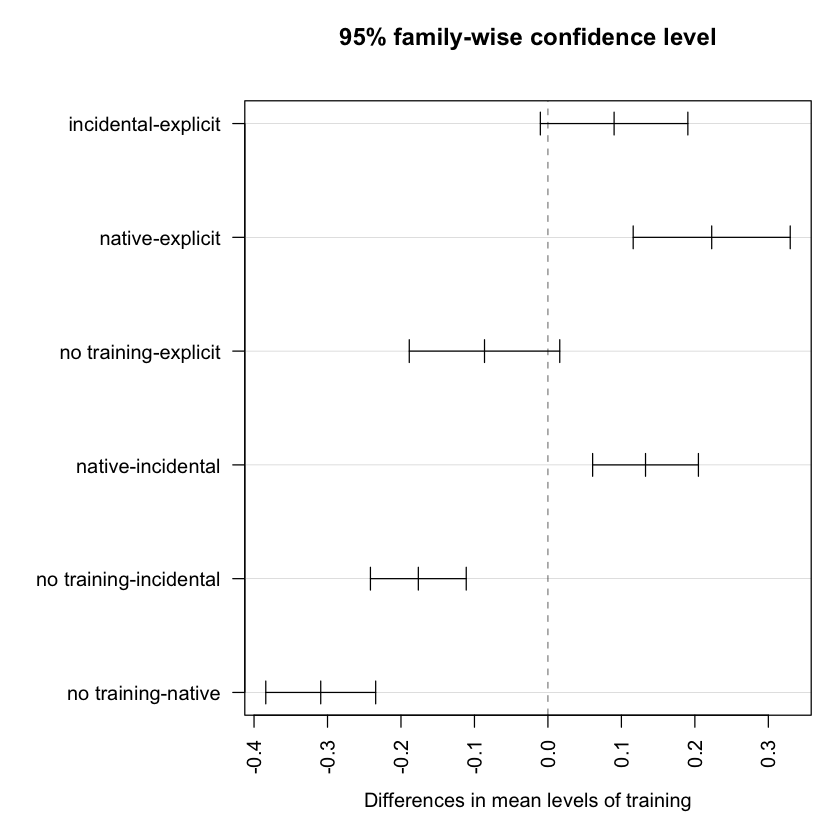

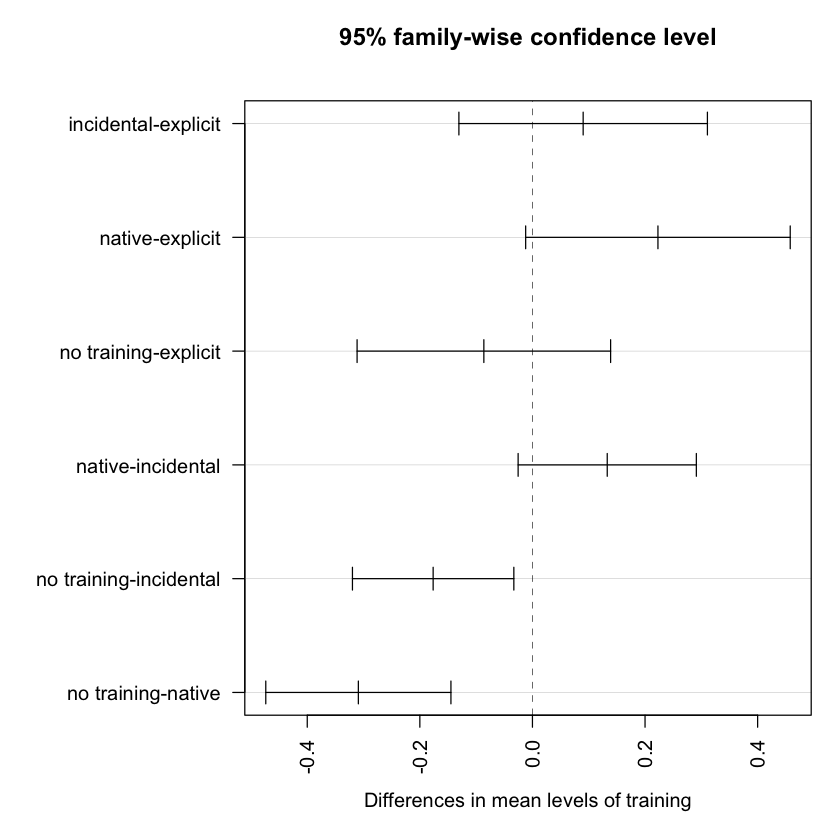

In [524]:
TukeyHSD(raw_anova)
TukeyHSD(proportion_anova)

par(mar=c(5,10,4,1)+.2) #changing plot margins so we can see our labels
plot(TukeyHSD(raw_anova, conf.level = .95), las = 2)
plot(TukeyHSD(proportion_anova, conf.level = .95), las = 2)

Based on our full analysis, we can see that our analysis of the raw data has returned 4 significant differences in group performance:
- native speakers vs. explicit training (native speakers outperform the explicit training group)
- native speakers vs. incidental training (native speakers outperform the incidental training group)
- native speakers vs. no training (native speakers outperform the no training group)
- no training vs. incidental training (the incidental group outperforms the no training group)

Our analysis of the proportional data has returned the following significant differences in group performance:
- no training vs. incidental training (the incidental training group outperforms the no training group)
- no training vs. native speakers (the native speakers outperform the no training group)

These results are interesting, but I am curious to see whether including native speakers in our analysis has had any effect on our results.  I will quickly run both of the models that we did above, but without the native speakers.

In [525]:
day3raw_nonative <- fulldata %>%
filter(day == 3) %>%
filter(training != 'native')

day3proportions_nonative <- target_fractions %>%
filter(day == 3) %>%
filter(training != 'native')

In [526]:
day3_raw_model_nonative <- lm(correct ~ training, data = day3raw_nonative)

day3_proportion_model_nonative <- lm(proportion_of_responses ~ training, data = day3proportions_nonative)

summary(day3_raw_model_nonative)
summary(day3_proportion_model_nonative)


Call:
lm(formula = correct ~ training, data = day3raw_nonative)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5172 -0.4271 -0.3408  0.4828  0.6592 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.42708    0.03532  12.091   <2e-16 ***
trainingincidental   0.09007    0.03926   2.294   0.0219 *  
trainingno training -0.08631    0.04005  -2.155   0.0313 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4894 on 1677 degrees of freedom
Multiple R-squared:  0.02779,	Adjusted R-squared:  0.02663 
F-statistic: 23.97 on 2 and 1677 DF,  p-value: 5.445e-11



Call:
lm(formula = proportion_of_responses ~ training, data = day3proportions_nonative)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26716 -0.09226  0.01339  0.08631  0.27451 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.42708    0.06290   6.790 1.13e-07 ***
trainingincidental   0.09007    0.06991   1.288    0.207    
trainingno training -0.08631    0.07132  -1.210    0.235    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1258 on 32 degrees of freedom
Multiple R-squared:  0.3209,	Adjusted R-squared:  0.2784 
F-statistic: 7.559 on 2 and 32 DF,  p-value: 0.002048


In [529]:
raw_anova_nonative <- aov(day3_raw_model_nonative)
proportion_anova_nonative <- aov(day3_proportion_model_nonative)

summary(raw_anova_nonative)
summary(proportion_anova_nonative)

              Df Sum Sq Mean Sq F value   Pr(>F)    
training       2   11.5   5.742   23.97 5.44e-11 ***
Residuals   1677  401.7   0.240                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value  Pr(>F)   
training     2 0.2392 0.11962   7.559 0.00205 **
Residuals   32 0.5064 0.01582                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = day3_raw_model_nonative)

$training
                              diff          lwr          upr     p adj
incidental-explicit     0.09007353 -0.002015643  0.182162702 0.0568412
no training-explicit   -0.08630952 -0.180259271  0.007640224 0.0794195
no training-incidental -0.17638305 -0.236189189 -0.116576917 0.0000000


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = day3_proportion_model_nonative)

$training
                              diff        lwr         upr     p adj
incidental-explicit     0.09007353 -0.0817120  0.26185906 0.4118438
no training-explicit   -0.08630952 -0.2615658  0.08894677 0.4559424
no training-incidental -0.17638305 -0.2879470 -0.06481913 0.0013674


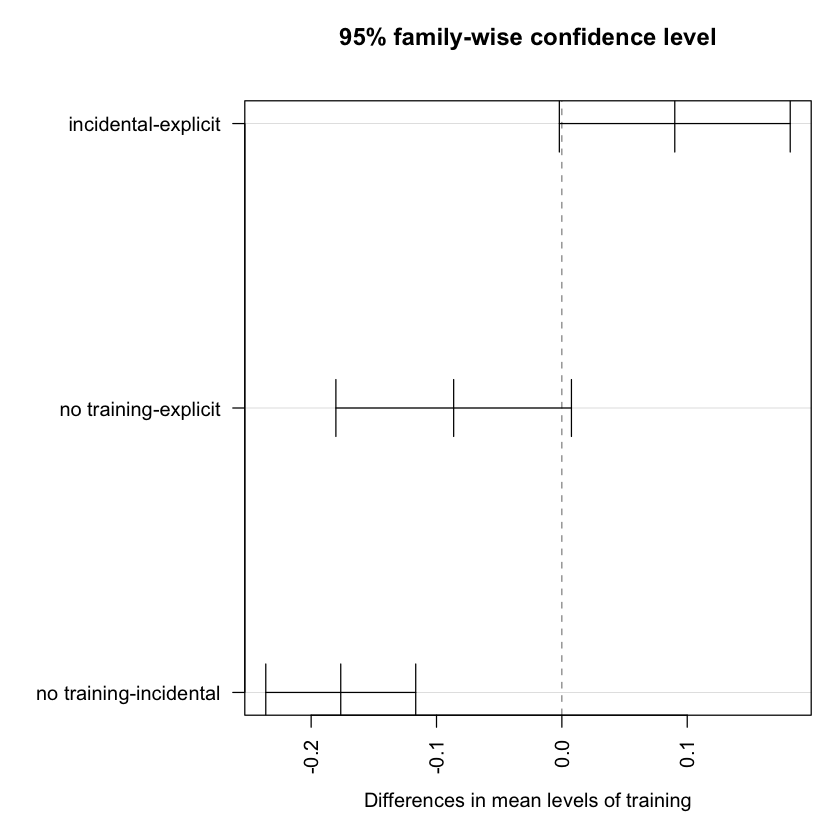

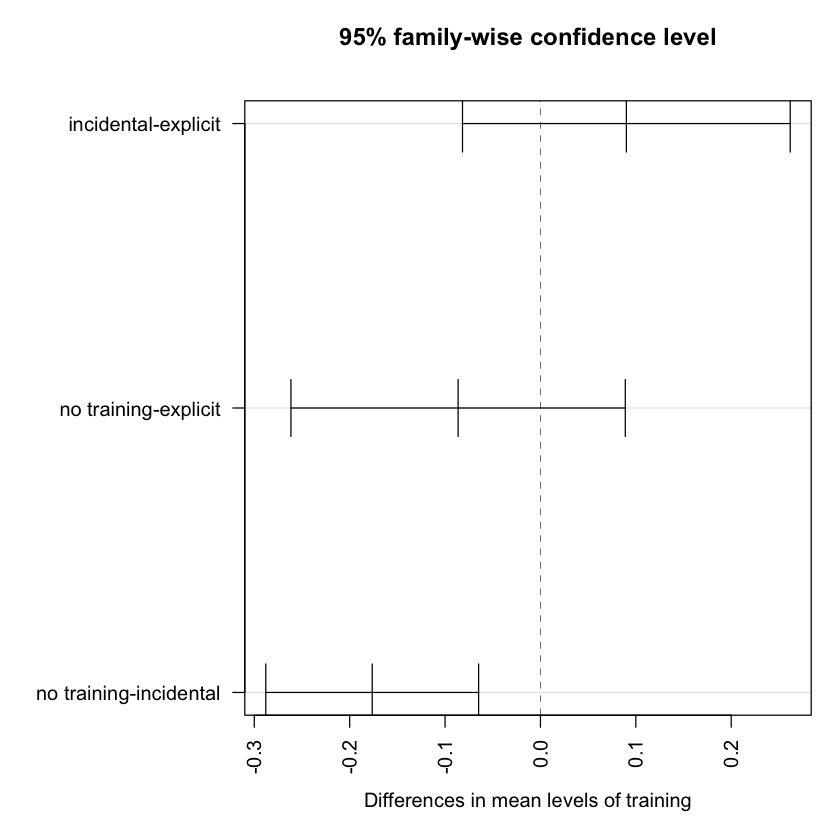

In [530]:
TukeyHSD(raw_anova_nonative)
TukeyHSD(proportion_anova_nonative)

par(mar=c(5,10,4,1)+.2) #changing plot margins so we can see our labels
plot(TukeyHSD(raw_anova_nonative, conf.level = .95), las = 2)
plot(TukeyHSD(proportion_anova_nonative, conf.level = .95), las = 2)

When we exclude native speakers from our analysis, we find the same results.  Based on these linear models, it does not appear that incidental training leads to improved perception of Mandarin tones when compared to explicit training.  However, it does lead to improvements above no training at all.

#### Predicting training group from proportion of correct responses and day using kNN

I am curious to see whether we can use our participants' results across days to predict what training group they were in.  If these predictions are remotely accurate, I will be more confident that we can actually see the differences in group performance that we predicted.

First, let's visualize how each of our training groups performed across each day with a scatterplot

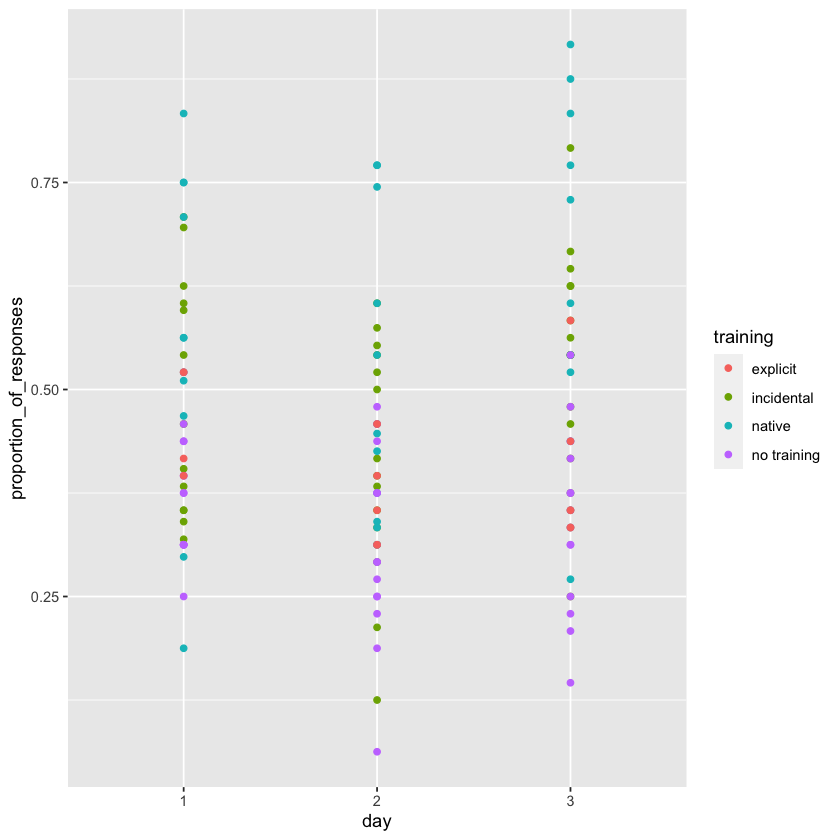

In [355]:
prediction_visualization <- ggplot(data = target_fractions, 
                                   aes(x = day, y = proportion_of_responses, 
                                   color = training)) +
                                   geom_point()

prediction_visualization

Interestingly, we see some clustering already, which indicates that classification with kNN might be possible.  

Let's start setting up our data to perform kNN.  I will be using the method outlined in the kNN lecture.

In [356]:
library(class)

In [358]:
nrow(target_fractions)

[1] 131

We have 131 observations when looking at each participant's proportion of correct responses for each day.  We can set aside some amount of these - let's start with 30- to be test observations.

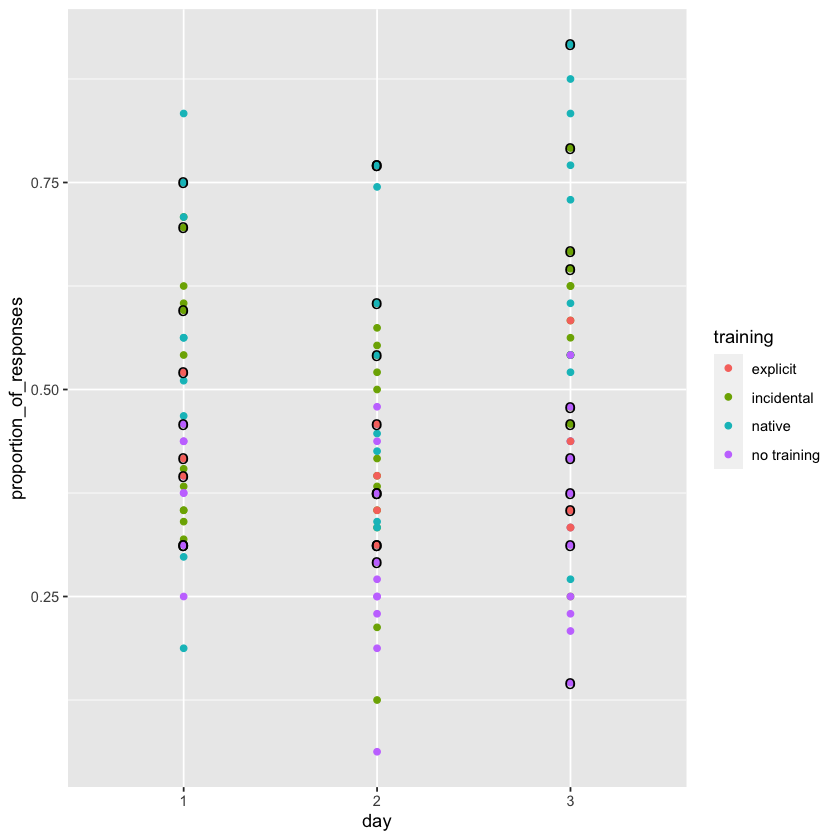

In [363]:
target_fractions_forknn <- target_fractions

test_obs <- sample(1:nrow(target_fractions_forknn), 30)
target_fractions_forknn$istest <- 1:nrow(target_fractions_forknn) %in% test_obs

ggplot(data = target_fractions_forknn, 
            aes(x= day, y= proportion_of_responses, 
            color = training)) +
            geom_point() +
            geom_point(data=target_fractions_forknn[test_obs,],
                       aes(x= day,y= proportion_of_responses),size=4,color="black",shape="o")

We will use k = 5 for this analysis.  I tested several other values, and this had the best accuracy.

In [534]:
train_predictions <- cbind(target_fractions_forknn$day[-test_obs],
                           target_fractions_forknn$proportion_of_responses[-test_obs])

test_predictions <- cbind(target_fractions_forknn$day[test_obs], 
                          target_fractions_forknn$proportion_of_responses[test_obs])

train_training <- target_fractions_forknn$training[-test_obs]

test_training_knn5 <- knn(train_predictions, test_predictions, train_training, 5) 

head(test_training_knn5)

[1] no training incidental  no training native      no training incidental 
Levels: explicit incidental native no training

Now, we will assess the accuracy of our kNN analysis.

,participant_public_id,day,participant_group,training,response,freq,number_of_trials,proportion_of_responses,istest,training_prediction,knn_correct
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<lgl>,<fct>,<lgl>
1,1001,1,1000,incidental,target,17,48,0.3541667,FALSE,incidental,TRUE
2,1001,2,1000,incidental,target,18,47,0.3829787,FALSE,incidental,TRUE
3,1001,3,1000,incidental,target,20,48,0.4166667,FALSE,incidental,TRUE
4,1002,1,1000,incidental,target,22,48,0.4583333,TRUE,no training,FALSE
5,1002,2,1000,incidental,target,17,48,0.3541667,FALSE,incidental,TRUE
6,1002,3,1000,incidental,target,22,48,0.4583333,TRUE,no training,FALSE


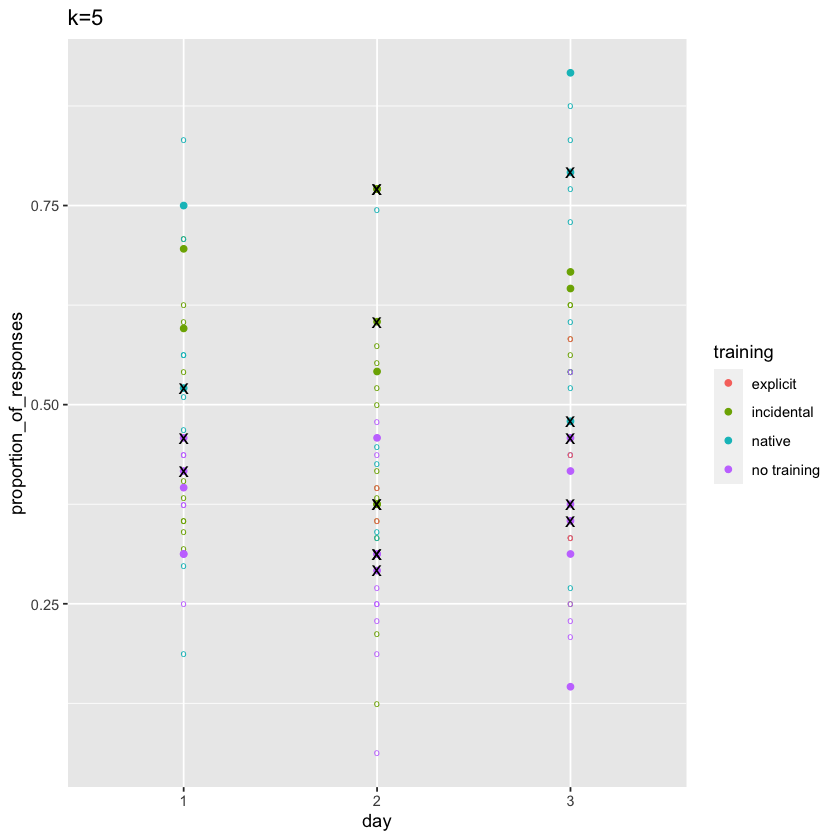

In [535]:
target_fractions_forknn$training_prediction <- target_fractions_forknn$training

target_fractions_forknn$training_prediction[test_obs] <- test_training_knn5 

target_fractions_forknn$knn_correct <- target_fractions_forknn$training == target_fractions_forknn$training_prediction

head(target_fractions_forknn)

ggplot(data = target_fractions_forknn, 
       aes(x= day, y= proportion_of_responses, color= training)) + 
       geom_point(size= 2, shape= "o") + 
       geom_point(data= target_fractions_forknn[test_obs,],
                   aes(x= day, y= proportion_of_responses, col= training_prediction)) + 
       geom_point(data=target_fractions_forknn[which(!target_fractions_forknn$knn_correct),],
                   aes(x= day, y= proportion_of_responses), shape= "x", color= "black", size= 4) +  
       ggtitle("k=5")

In [372]:
#quantify accuracy with a confusion matrix

confusion_df <- data.frame(predicted = test_training_knn, actual = target_fractions_forknn$training[test_obs])
table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

             actual
predicted     explicit incidental native no training
  explicit           0          0      0           0
  incidental         0          5      3           2
  native             0          1      2           1
  no training        1          8      0           7

[1] "Accuracy: 0.466666666666667"


As we can see from the confusion matrix and reported accuracy of our kNN classification with k = 5, we were able to predict each participant's training group with greater-than-chance accuracy (25%).

This isn't perfect, but does indicate that there is some tangible correlation between training group and proportion of correct responses. 

#### Power Analysis

Because the number of participants in each training group are relatively uneven, and because our participants n is a little low overall, I will perform a power analysis to see whether we can actually make any conclusions from our previous analysis. (I don't think this wording is 100% correct, fix it)

In order to run this power analysis, I will be using the basic simulation algorithm outlined in the "Power Analysis with Simulation" lecture from class.

I wanted to determine whether participants in the incidental training group will outperform participants in all other training groups (except native speakers).  I can specify the expected mean and variability of each group's proportion of correct responses from the data I have.  Then, I can use these statistics to simulate data for different numbers of participants from each group.  With this simulation, I can determine how many participants I would need in each group to consistently detect an effect.

We will perform our power analysis specifically for the day 3 only model on proportion of correct responses that does NOT include native speakers.  This will make simulating our data much easier.

In [435]:
simulate_incidental_data <- function(size, mean, sd) {
    incidental_data <- data.frame(training = 'incidental', proportion_correct = rnorm(size, mean, sd))
    return(incidental_data)
}

simulate_explicit_data <- function(size, mean, sd) {
    incidental_data <- data.frame(training = 'explicit', proportion_correct = rnorm(size, mean, sd))
    return(incidental_data)
}

simulate_notraining_data <- function(size, mean, sd) {
    incidental_data <- data.frame(training = 'no training', proportion_correct = rnorm(size, mean, sd))
    return(incidental_data)
}

simulate_data <- function(incidental_size, explicit_size, notraining_size, 
                          mean_correct_incidental, sd_correct_incidental,
                          mean_correct_explicit, sd_correct_explicit,
                          mean_correct_notraining, sd_correct_notraining) {
    incidental <- simulate_incidental_data(incidental_size, mean_correct_incidental, sd_correct_incidental)
    explicit <- simulate_explicit_data(explicit_size, mean_correct_explicit, sd_correct_explicit)
    no_training <- simulate_notraining_data(notraining_size, mean_correct_notraining, sd_correct_notraining)
    
    return(rbind(incidental, explicit, no_training))
}

simulate_data(1, 1, 1, 0.6, 0.05, 0.4, 0.05, 0.3, 0.05)

training,proportion_correct
<fct>,<dbl>
incidental,0.6195010
explicit,0.4379466
no training,0.3872363


Now that we know our data simulation works, let's find the mean, sd, and n of each training group's proportion of correct responses on day 3 so that we can accurately simulate our data.

In [457]:
target_means_day3 <- aggregate(day3proportions$proportion_of_responses, list(day3proportions$training), FUN=mean)
colnames(target_means_day3) <- c("training", "mean_day3")  

target_sd_day3 <- aggregate(day3proportions$proportion_of_responses, list(day3proportions$training), FUN=sd)
colnames(target_sd_day3) <- c('training', 'SD_day3')

n_day3 <- day3proportions %>% count(training)

summary_stats <- merge(target_means_day3, target_sd_day3)
summary_stats <- merge(summary_stats, n_day3)
summary_stats

training,mean_day3,SD_day3,n
<fct>,<dbl>,<dbl>,<int>
explicit,0.4270833,0.1134732,4
incidental,0.5171569,0.1397999,17
native,0.6500000,0.2096716,10
no training,0.3407738,0.1092073,14


Now, we can simulate our original data and run a power analysis on the linear model for our original number of participants

In [459]:
simulation <- simulate_data(incidental_size = 17,
              explicit_size = 4,
              notraining_size = 14,
              mean_correct_incidental = 0.5171569, sd_correct_incidental = 0.1397999,
              mean_correct_explicit = 0.4270833, sd_correct_explicit = 0.1134732,
              mean_correct_notraining = 0.3407738, sd_correct_notraining = 0.1092073)

head(simulation)

,training,proportion_correct
,<fct>,<dbl>
1,incidental,0.2872798
2,incidental,0.4056900
3,incidental,0.5968886
4,incidental,0.5060132
5,incidental,0.4829794
6,incidental,0.4680297


writing a function that will perform our linear regression analysis and ANOVA

In [497]:
simulate_analysis <- function(data) {
    model <- lm(proportion_correct ~ training, data = data)
    return(anova(model)[1, 5])
}

simulate_analysis(simulation)

[1] 0.00109114

Our next step is writing a function that will repeat this analysis a given number of times

In [501]:
repeat_analysis <- function(n_simulations, alpha, incidental_size, 
                            explicit_size, notraining_size, 
                            mean_correct_incidental, sd_correct_incidental,
                            mean_correct_explicit, sd_correct_explicit,
                            mean_correct_notraining, sd_correct_notraining) {
    
simouts <- matrix(rep(NA,n_simulations),nrow=n_simulations,ncol=1) 
# empty vector to store p-values from each simulation
    
# loop for repeating the simulation
for (i in 1:n_simulations) {
    data <- simulate_data(incidental_size, 
                        explicit_size, notraining_size, 
                        mean_correct_incidental, sd_correct_incidental,
                        mean_correct_explicit, sd_correct_explicit,
                        mean_correct_notraining, sd_correct_notraining)
        simouts[i,] <- simulate_analysis(data) 
    }
    
    # calculate coverage (AKA power)
    cvg <- mean(simouts[,1] <= alpha) 

    return(list(cvg = cvg)) #return a list with the power as the probability of a sig. result and the corresponding p-values
}


Now, we can repeat our analysis with our original group n's to see whether we have enough coverage to consistently find the effect we found in our original analysis.

In [502]:
repeat_analysis(n_simulations = 1000, alpha = 0.05, incidental_size = 17,
              explicit_size = 4,notraining_size = 14,
              mean_correct_incidental = 0.5171569, sd_correct_incidental = 0.1397999,
              mean_correct_explicit = 0.4270833, sd_correct_explicit = 0.1134732,
              mean_correct_notraining = 0.3407738, sd_correct_notraining = 0.1092073)

$cvg
[1] 0.913

The coverage with our original numbers of group members is pretty good: we find a significant difference between groups 91.3% of the time.  To exhaust our power analysis, I will vary our group n's (keeping them the same across groups for the sake of simplicity).

In [504]:
dataframe <- expand.grid(sample_size = 5:30, alpha = c(0.05,0.01,0.001))
dataframe$id <- 1:nrow(dataframe) 

power_results <- dataframe  %>%  
    nest(parameters :=  c(sample_size,alpha)) %>%  
    mutate(power = map(parameters, ~ repeat_analysis(n_simulations = 1000, .$alpha, 
                                                     incidental_size = .$sample_size, explicit_size = .$sample_size, 
                                                     notraining_size = .$sample_size,
                                                     mean_correct_incidental = 0.5171569, sd_correct_incidental = 0.1397999,
                                                     mean_correct_explicit = 0.4270833, sd_correct_explicit = 0.1134732,
                                                     mean_correct_notraining = 0.3407738, sd_correct_notraining = 0.1092073)$cvg)) %>% 

unnest(c(parameters, power)) 

In [505]:
head(power_results)

id,sample_size,alpha,power
<int>,<int>,<dbl>,<dbl>
1,5,0.05,0.421
2,6,0.05,0.481
3,7,0.05,0.604
4,8,0.05,0.682
5,9,0.05,0.725
6,10,0.05,0.779


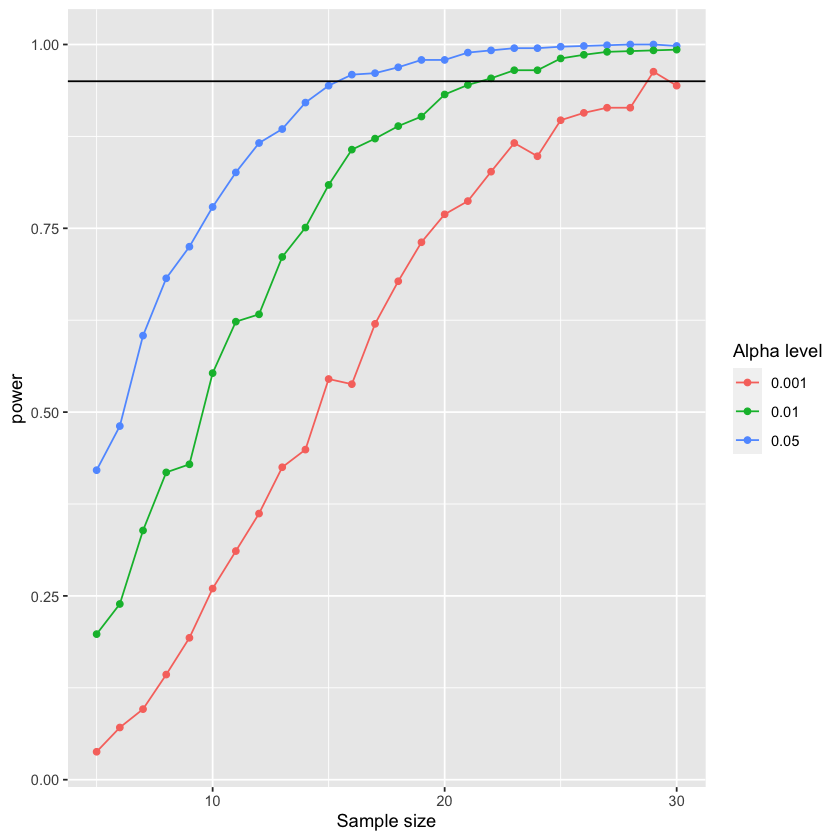

In [507]:
ggplot(data = power_results, aes(x = sample_size, y = power, color = as.factor(alpha), group=alpha)) +
    geom_point() +
    geom_line() + 
    geom_hline(yintercept = 0.95) +
    scale_color_discrete('Alpha level') +
    scale_x_continuous('Sample size') 

This graph of all of our power analysis combinations shows us that, for the group means and sd's of our original data, we ideally should have used ~20 participants per group to consistently find a significant difference in proportion of correct responses on the T4AFC task.  We could reasonably call our original data underpowered, but because our original repeated analysis outputted a coverage of ~90%, I feel confident that our power was high enough to have continued with our original analysis.

TODO:
- fill in the introductory and conclusions sections with relevant information- can take all from thesis paper
- read through every line of this notebook to make sure there's nothing I've directly copy-pasted

### Conclusions

*A short (1 paragraph) conclusion with respect to the models you have run*

The analyses that I performed on this data revealed several things that I had not realized during my initial analyses for my senior thesis.  Specifically, I did not expect there to be a difference in the results of the linear models that considered either raw or proportional transformations of participants' correct responses.  However, these two linear models both revealed that, outside of the no-training group, incidental training likely did not lead to improved performance over explicit training.  The effects were very close to significance, though, so there may be a weak effect that could be more easily identified with repeated studies with larger participant groups.  This leads me to my second conclusion, which was that our power analysis revealed a higher power for this experiment than I originally expected.  This analysis returned a ~90% coverage for simulated data that matched the number of participants of our original data, and the rest of the analysis indicates that we could see a consistent effect with only slightly larger participant groups of ~20 participants each.  Finally, I was also surprised by the accuracy of our predictions using the kNN method.  Given the underwhelming results of our linear models, I did not anticipate that this approach would be able to predict training from day and proportion of correct responses with above-chance accuracy.  Although our prediction accuracy wasn't great, it was better than expected, which gives me more confidence in this data.  

Overall, I enjoyed analyzing this data in new ways and understanding it more thoroughly, especially with the power analysis and prediction via kNN. I would love to collect more data with this same experimental setup and repeat these analyses.